In [ ]:
import numpy as np  # mathematical operations
import matplotlib.pyplot as plt # graphic
from sklearn.datasets import fetch_openml # dataset
from sklearn.preprocessing import StandardScaler # climb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic regresion
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
import seaborn as sns  # Only for palettes, not for pipeline or abstractions


In [ ]:
# Download mnist (it can take a bit the first time)
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X_raw, y_raw = mnist["data"], mnist["target"]

# Convert integers
y_raw = y_raw.astype(int)

print("X form:", X_raw.shape)
print("Y form:", y_raw.shape)

Forma de X: (70000, 784)
Forma de y: (70000,)


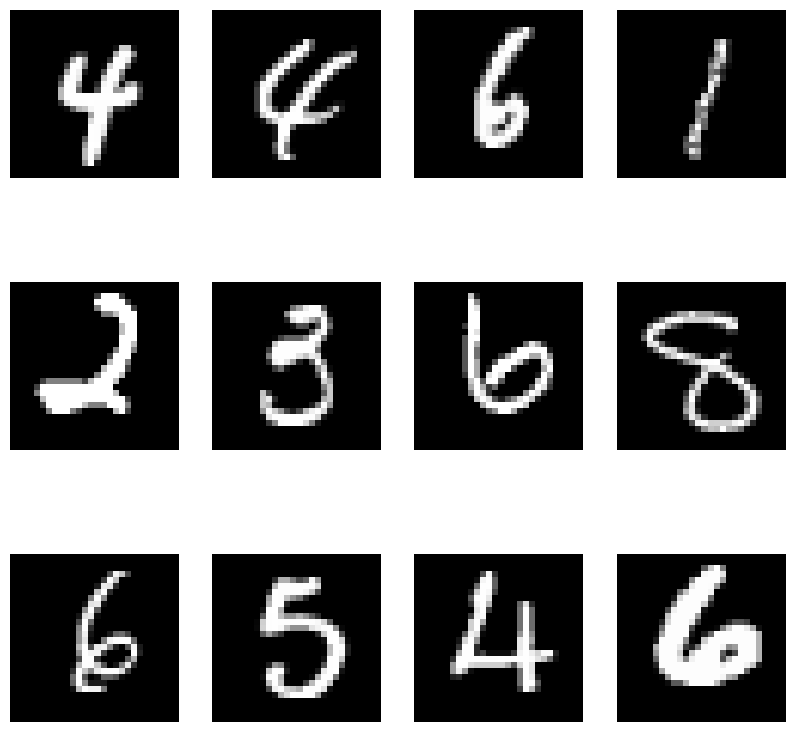

In [ ]:
plt.figure(figsize=(10, 10))
indices = np.random.choice(len(X_raw),12)

for i, index in enumerate(indices):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_raw[index].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()

In [ ]:
X_raw = X_raw[:5000]
y_raw = y_raw[:5000]

In [ ]:
X_raw.shape

(5000, 784)

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

(4000, 784)

In [ ]:
len(y_train)

4000

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.941

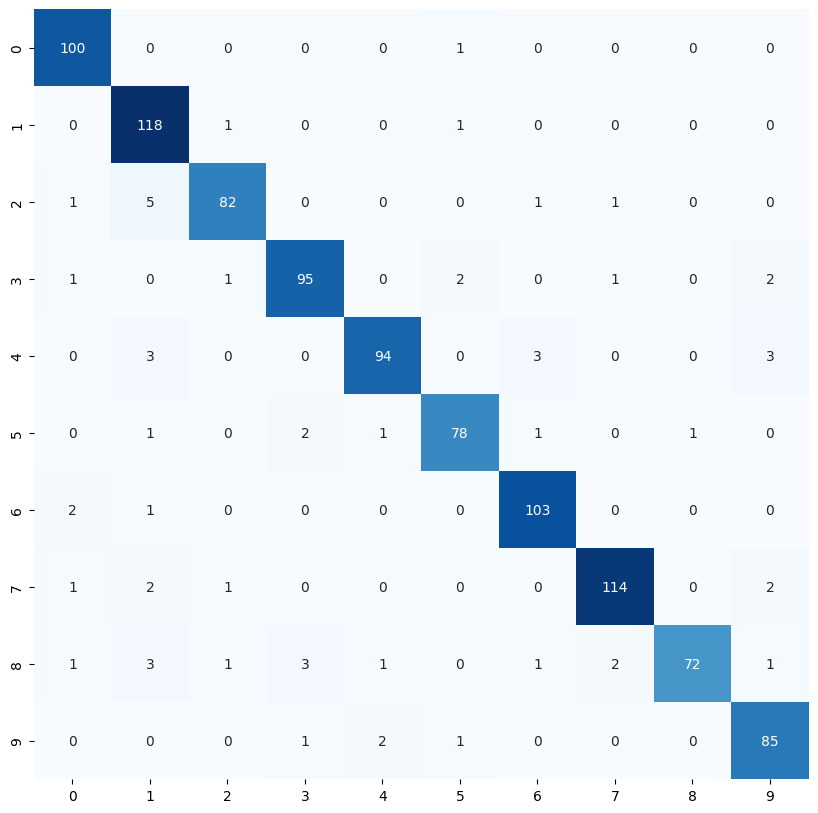

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=range(10))

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.show()

In [ ]:
rl = LogisticRegression(max_iter = 1000, solver = "lbfgs")
rl.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = rl.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.877

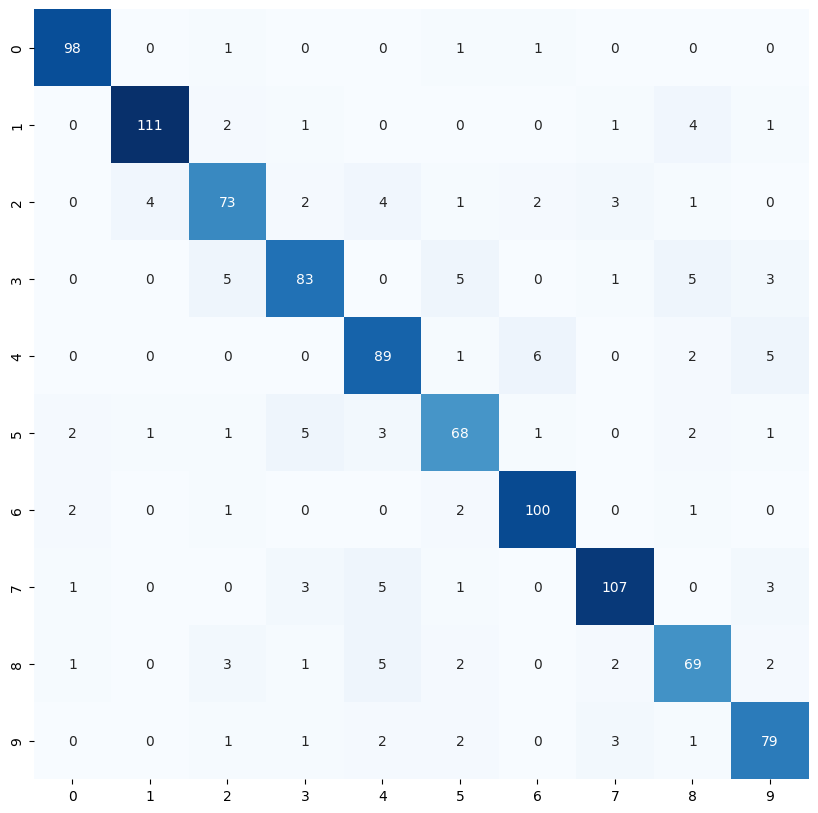

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=range(10))

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=range(10), yticklabels=range(10))
plt.show()